# Projection and $A=QR$

```{admonition} Definition: Span
The *span* of a set of vectors $\{\mathbf{v}_1, \dots, \mathbf{v}_k\}$ is the set of all linear combinations $c_1\mathbf{v_1} + \cdots + c_k\mathbf{v}_k$.
```

The span of a set of vectors is a geometric object.

**Example:** The span of a single vector $\mathbf{v}$ is the line in the direction of $\mathbf{v}$. A linear combination in the case of a single vector is just a scalar multiple of the vector, and that will point either in the same direction or the exact opposite direction if the sign of the scalar is negative.

**Example:** The span of two linearly independent vectors three dimensional vectors is a plane. We can see this easily, for example, with vectors like 

$$
    \mathbf{e}_1 = \begin{bmatrix}
                        1 \\
                        0 \\
                        0
                    \end{bmatrix}\text{ and }
    \mathbf{e}_2 = \begin{bmatrix}
                        0 \\
                        1 \\
                        0
                    \end{bmatrix}
$$

whose linear combinations produce all vectors in the $x$-$y$ plane and none that are not in the $x$-$y$ plane because of the 0 in the third component.

Given a set of vectors $\{\mathbf{v}_1,\dots, \mathbf{v}_k\}$ and another vector $\mathbf{b}$ that is not in their span, one can ask for the vector in the span of $\{\mathbf{v}_1,\dots, \mathbf{v}_k\}$ 'nearest' to $\mathbf{b}$. We define the nearest vector to $\mathbf{b}$ in the span of $\{\mathbf{v}_1,\dots, \mathbf{v}_k\}$ to be the vector $\mathbf{p}$ for which the distance from the terminus of $\mathbf{b}$ to the terminus of $\mathbf{p}$ is as small as possible. This is sketched in two and three dimensions below.

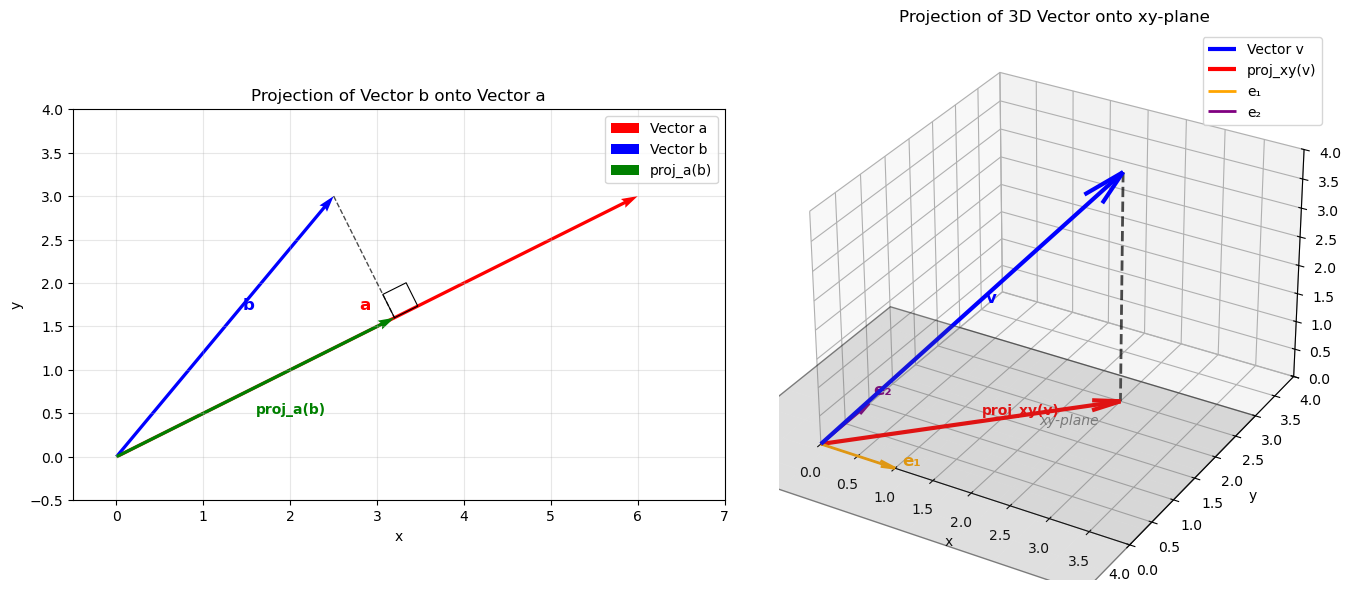

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Create figure with two subplots
fig = plt.figure(figsize=(14, 6))

# Left plot: 2D vector projection of b onto a
ax1 = fig.add_subplot(121)

# Define vectors - make 'a' significantly longer
a = np.array([6, 3])
b = np.array([2.5, 3])

# Calculate projection of b onto a
proj_b_onto_a = (np.dot(b, a) / np.dot(a, a)) * a

# Plot vectors
ax1.quiver(0, 0, a[0], a[1], angles='xy', scale_units='xy', scale=1, color='red', width=0.005, label='Vector a')
ax1.quiver(0, 0, b[0], b[1], angles='xy', scale_units='xy', scale=1, color='blue', width=0.005, label='Vector b')
ax1.quiver(0, 0, proj_b_onto_a[0], proj_b_onto_a[1], angles='xy', scale_units='xy', scale=1, color='green', width=0.005, label='proj_a(b)')

# Draw the perpendicular line from b to its projection
ax1.plot([b[0], proj_b_onto_a[0]], [b[1], proj_b_onto_a[1]], 'k--', alpha=0.7, linewidth=1)

# Add right angle marker
perp_vec = b - proj_b_onto_a
if np.linalg.norm(perp_vec) > 0:
    # Create a small square to show right angle
    corner_size = 0.3
    corner_start = proj_b_onto_a
    a_unit = a / np.linalg.norm(a)
    perp_unit = perp_vec / np.linalg.norm(perp_vec)
    
    corner_points = np.array([
        corner_start,
        corner_start + corner_size * a_unit,
        corner_start + corner_size * a_unit + corner_size * perp_unit,
        corner_start + corner_size * perp_unit,
        corner_start
    ])
    ax1.plot(corner_points[:, 0], corner_points[:, 1], 'k-', linewidth=0.8)

# Set equal aspect ratio and add grid
ax1.set_xlim(-0.5, 7)
ax1.set_ylim(-0.5, 4)
ax1.set_aspect('equal')
ax1.grid(True, alpha=0.3)
ax1.legend()
ax1.set_title('Projection of Vector b onto Vector a')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

# Add vector labels
ax1.text(a[0]/2 - 0.2, a[1]/2 + 0.2, 'a', fontsize=12, color='red', weight='bold')
ax1.text(b[0]/2 + 0.2, b[1]/2 + 0.2, 'b', fontsize=12, color='blue', weight='bold')
ax1.text(proj_b_onto_a[0]/2, proj_b_onto_a[1]/2 - 0.3, 'proj_a(b)', fontsize=10, color='green', weight='bold')

# Right plot: 3D vector projection onto xy-plane
ax2 = fig.add_subplot(122, projection='3d')

# Define a 3D vector - moved to better show basis vectors
v_3d = np.array([2.5, 2.5, 4])

# Projection onto xy-plane (z=0)
v_proj_xy = np.array([v_3d[0], v_3d[1], 0])

# Plot the original 3D vector
ax2.quiver(0, 0, 0, v_3d[0], v_3d[1], v_3d[2], color='blue', arrow_length_ratio=0.1, linewidth=3, label='Vector v')

# Plot the projection onto xy-plane
ax2.quiver(0, 0, 0, v_proj_xy[0], v_proj_xy[1], v_proj_xy[2], color='red', arrow_length_ratio=0.1, linewidth=3, label='proj_xy(v)')

# Add basis vectors e1 and e2 for the xy-plane
e1 = np.array([1, 0, 0])  # x-axis basis vector
e2 = np.array([0, 1, 0])  # y-axis basis vector

ax2.quiver(0, 0, 0, e1[0], e1[1], e1[2], color='orange', arrow_length_ratio=0.2, linewidth=2, label='e₁')
ax2.quiver(0, 0, 0, e2[0], e2[1], e2[2], color='purple', arrow_length_ratio=0.2, linewidth=2, label='e₂')

# Draw the perpendicular line from vector tip to its projection
ax2.plot([v_3d[0], v_proj_xy[0]], [v_3d[1], v_proj_xy[1]], [v_3d[2], v_proj_xy[2]], 'k--', alpha=0.7, linewidth=2)

# Create xy-plane as a transparent surface
xx, yy = np.meshgrid(np.linspace(-1, 4, 10), np.linspace(-1, 3, 10))
zz = np.zeros_like(xx)
ax2.plot_surface(xx, yy, zz, alpha=0.2, color='gray')

# Add plane outline
plane_x = [-1, 4, 4, -1, -1]
plane_y = [-1, -1, 3, 3, -1]
plane_z = [0, 0, 0, 0, 0]
ax2.plot(plane_x, plane_y, plane_z, 'k-', alpha=0.5, linewidth=1)

# Set labels and title
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
ax2.set_title('Projection of 3D Vector onto xy-plane')
ax2.legend()

# Set equal aspect ratio for 3D plot
max_range = 4
ax2.set_xlim([0, max_range])
ax2.set_ylim([0, max_range])
ax2.set_zlim([0, max_range])

# Add vector labels
ax2.text(v_3d[0]/2 + 0.2, v_3d[1]/2, v_3d[2]/2 + 0.2, 'v', fontsize=12, color='blue', weight='bold')
ax2.text(v_proj_xy[0]/2, v_proj_xy[1]/2 + 0.2, v_proj_xy[2], 'proj_xy(v)', fontsize=10, color='red', weight='bold')
ax2.text(e1[0] + 0.1, e1[1], e1[2] + 0.1, 'e₁', fontsize=12, color='orange', weight='bold')
ax2.text(e2[0], e2[1] + 0.1, e2[2] + 0.1, 'e₂', fontsize=12, color='purple', weight='bold')
ax2.text(2, 1.5, 0.1, 'xy-plane', fontsize=10, color='gray', style='italic')

plt.tight_layout()
plt.show()

## Projection onto a Single Vector

In the example illustrated above on the right, $\mathbf{b}$ is being projected onto the span of $\mathbf{a}$, which is simply the line in the direction that $\mathbf{a}$ points. So $\mathbf{p}$ must be a scalar multiple of $\mathbf{a}$; that is, $\mathbf{p} = x\mathbf{a}$, and determining $\mathbf{p}$ amounts simply to determining the correct scalar $x$. 

To determine $x$, note that the distance between the termini of the two vectors is shortest when a ray drawn from the tip of $\mathbf{b}$ forms a right angle with $\mathbf{a}$. This coincides with the terminus of the projection $\mathbf{p}$ that we are trying to determine, and the ray can be expressed as a vector $\mathbf{e} = \mathbf{b} - \mathbf{p}$ (sketch this yourself using the parallelogram rule for vector addition if you're not convinced). Vectors at right angles have a dot product of 0.

```{admonition} Definition: Orthogonality

Vectors $\mathbf{v}_1$, $\mathbf{v}_2$ are said to be *orthogonal* if $\mathbf{v}_1^T\mathbf{v}_2 = 0$. A set of vectors $\mathbf{v}_1, \dots, \mathbf{v}_k$ is *orthogonal* if $mathbf{v}_i^T\mathbf{v}_j = 0$ for all $1\leq i, j \leq k$ such that $i \neq j$. If all of the vectors are unit vectors, we call the set *orthonormal*.
```

'Orthogonal' is a term that means the same thing as 'perpendicular' when working with lines, planes, and so on, but is also used more generally to describe similar notions with things that are non necessarily linear (see, for example, [orthogonal functions](https://en.wikipedia.org/wiki/Orthogonal_functions)).

The vectors $\mathbf{e}$ and $\mathbf{a}$ are orthogonal, so $\mathbf{a}^T\mathbf{e} = 0$. We can use this to solve for $x$:

$$
    \begin{align*}
        \mathbf{a}^T\mathbf{e} &= 0 \\
        \mathbf{a}^T(\mathbf{b} - \mathbf{p}) &= 0 \\
        \mathbf{a}^T(\mathbf{b} - x\mathbf{a}) &= 0 \\
        \mathbf{a}^T\mathbf{b} - x\mathbf{a}^T\mathbf{a} &= 0 \\
        \mathbf{a}^T\mathbf{b} &= x\mathbf{a}^T\mathbf{a} \\
        \frac{\mathbf{a}^T\mathbf{b}}{\mathbf{a}^T\mathbf{a}} &= x,
    \end{align*}
$$

and once we know $x$ we know $\mathbf{p} = x\mathbf{a}$. 

**Example:** Given $\mathbf{u}$ and $\mathbf{v}$, below, we will calculate the projection $\mathbf{p}$ of $\mathbf{u}$ onto the line spanned by $\mathbf{v}$:

$$
    \mathbf{u} = \begin{bmatrix}
                    2 \\
                    1 \\
                    1 \\
                    2
                \end{bmatrix}\text{, }
    \mathbf{v} = \begin{bmatrix}
                    0 \\
                    -1 \\
                    1 \\
                    2
                \end{bmatrix}.
$$

Then 

$$
    x = \frac{\mathbf{v}^T\mathbf{u}}{\mathbf{v}^T\mathbf{v}} = \frac{2\cdot0 + 1\cdot (-1) + 1\cdot 1 + 2\cdot 2}{0^2 + (-1)^2 + 1^2 +2^2} = \frac{4}{6} = \frac{2}{3},
$$

and 

$$
    \mathbf{p} = x\mathbf{v} = \frac{2}{3}\begin{bmatrix}
                    0 \\
                    -1 \\
                    1 \\
                    2
                \end{bmatrix} = 
                \begin{bmatrix}
                    0 \\
                    -2/3 \\
                    2/3 \\
                    4/3
                \end{bmatrix}.
$$

Now suppose that instead of projecting onto a line spanned by a single vector, we want to project a vector $\mathbf{b}$ onto the span of several vectors $A_1, \dots, A_n$. As you can probably guess from the choice of notation, these vectors are going to end up in the columns of a matrix shortly, but for the moment we will simply set the same 'nearness' condition for the projection; that is, for each $A_i$, $1\leq i\leq n$ we want to determine $x_i$ so that $A_i^T(\mathbf{b} - xA_i) = 0$. This gives us a system:

$$
    \begin{align*}
        A_1^T(\mathbf{b} - x_1A_1) &= 0 \\
        \vdots & \\
        A_n^T(\mathbf{b} - x_nA_n) &= 0
    \end{align*}
$$

This system can be better written as the matrix equation

$$
    A^T(\mathbf{b} - A\mathbf{x}) = 0,
$$

and this can be solved for $\mathbf{x}$:

$$
    \begin{align*}
        A^T(\mathbf{b} - A\mathbf{x}) &= 0 \\
        A^T\mathbf{b} - A^TA\mathbf{x} &= 0 \\
        A^T\mathbf{b} &= A^TA\mathbf{x} \\
        (A^TA)^{-1}A^T\mathbf{b} &= \mathbf{x}.
    \end{align*}
$$

Then, as in the single-vector case, the projection can be found by multiplying the $A_i$'s by $\mathbf{x}$:

$$
    \mathbf{p} = A\mathbf{x} = A(A^TA)^{-1}A^T\mathbf{b}.
$$

### Similarity to the Normal Equation from OLS

Before going further, note the similarity with the normal equation $\mathbf{b} = (X^TX)^{-1}X^T\mathbf{y}$ from the last section. In the normal equation, $X$ contains our input data, $\mathbf{y}$ is a vector of known values, and $\mathbf{b}$ represents a vector of unknowns, and these can be translated to the projection formula's $A$, $\mathbf{b}$, and $\mathbf{x}$ respectively. Aside from the different choice of variable names, we have the same formula for the unknowns: $(A^TA)^{-1}A^T\mathbf{b} = \mathbf{x}$, and we derive the predictions in OLS in the same way we obtain the projection vector once we have $\mathbf{x}$: $X\mathbf{b} = X(X^TX)^{-1}X^T\mathbf{y}$ for OLS or $A\mathbf{x} = A(A^TA)^{-1}A^T\mathbf{b}$ for projection. This provides a geometric explanation for why the normal equation is the right solution to the problem of fitting a line: the normal equation produces the coefficients that map $\mathbf{y}$ into the span of the data in the columns of $X$ so that we land on the nearest vector to $\mathbf{y}$ that is in the span of the columns of $X$.

Since we have arrived back at the normal equation, we have also arrived back at the question we ended the last section with: how can we compute these quantities without inverting $A^TA$?

## Gram-Schmidt Orthogonalization

Given a set of vectors $\mathbf{v}_1,\dots, \mathbf{v}_k$, it is possible to algorithmically produce a set of vectors $\mathbf{q}_1,\dots,\mathbf{q}_k$ that have the same span but are orthogonal to each other. The process of doing so it called *Gram-Schmidt orthogonalization*.

**The Gram-Schmidt Orthogonalization Algorithm**
1. Set $\mathbf{q_1} = \mathbf{v_1}$.
2. Set $\mathbf{q_2} = \mathbf{v}_2 - \text{proj}_{\mathbf{q}_1}(\mathbf{v}_2)$, where $\text{proj}_{\mathbf{q}_1}(\mathbf{v}_2)$ denotes the projection of $\mathbf{v}_2$ in the direction of $\mathbf{q}_1$.
3. Set $\mathbf{q_3} = \mathbf{v_3} - \text{proj}_{\mathbf{q}_1}(\mathbf{v}_3) - \text{proj}_{\mathbf{q}_2}(\mathbf{v}_3)$.
4. Continue this process until you have produced $k$ orthogonal vectors $\mathbf{q}_1,\dots,\mathbf{q}_k$.

It is common to extend this process slightly to produce an orthonormal set by dividing each $\mathbf{q}_i$ by its length after obtaining it from the above process. Doing so is then called the Gram-Schmidt orthonormalization process.

We can verify (somewhat tediously) that the process above produces vectors that are orthogonal to each other. What about their span?  When $\mathbf{q}_2$ is formed following the algorithm above, we have simply produced a vector analagous to the vector $\mathbf{e} = \mathbf{b} - \mathbf{p}$ from our earlier derivation of the projection formula. This changes $\mathbf{v}_2$, but not the directional piece of $\mathbf{v}_2$ that differs from the direction of $\mathbf{v}_1$, and this means that the result is a set of vectors $\mathbf{q}_1, \mathbf{q}_2$ that span the same space as the original $\mathbf{v}_1, \mathbf{v}_2$. Further iterations of the process are messier but follow the same logic.

More formally, note that each $\mathbf{q}_i$ is simply a linear combination of the $\mathbf{v}_j$'s, which means that each $\mathbf{q}_i$ is in the span of the $\mathbf{v}_j$'s, and so any linear combination of the $\mathbf{q}_i$'s must also be in the span of the $\mathbf{v}_j$'s. Conversely, suppose $\mathbf{x}$ is a vector in the span of the $\mathbf{v}_i$'s. In the above algorithm, move each of the proj$_{\mathbf{q}_i}(\mathbf{v}_j)$'s to the left-hand side: each such projection is by definition a scalar multiple of the vector $\mathbf{q}_i$ being projected onto, so the $\mathbf{v}_j$'s are in the span of the $\mathbf{q}_i$'s also. Thus, the spans must be the same.

## $A = QR$ via Gram-Schmidt

The above algorithm extends naturally to the factorization that is our goal: $A = QR$. We just showed that given a set of vectors $\mathbf{v}_1,\dots, \mathbf{v}_k$, it is possible to algorithmically produce a set of vectors $\mathbf{q}_1,\dots,\mathbf{q}_k$ that have the same span but are orthogonal to each other. In showing this, we noted that each $\mathbf{v}_j$ is expressible as a linear combination of the $\mathbf{q}_i$'s; in particular,

$$
    \mathbf{v}_i = \sum_{j=1}^i r_{ji}\mathbf{q}_j,
$$

where the $r_j$'s are corresponding projection coefficients. So let's do this using the columns of a matrix $A$ as the $\mathbf{v}_i$'s, and write all of these linear combinations in a matrix multiplication:

$$
    \begin{bmatrix}
        \vdots & \vdots & \vdots \\
        A_1 & \vdots & A_n \\
        \vdots & \vdots & \vdots
    \end{bmatrix} = 
    \begin{bmatrix}
        \vdots & \vdots & \vdots \\
        \mathbf{q}_1 & \vdots & \mathbf{q}_n \\
        \vdots & \vdots & \vdots
    \end{bmatrix}
    \begin{bmatrix}
        r_{11} & r_{12} & \dots & r_{1n} \\
        0 & r_{22} & \dots & r_{2n} \\
        \vdots & & & \\
        0 & 0 & \dots & r_{nn}
    \end{bmatrix}.
$$

Go one step further and for each $j$, $1\leq j \leq n$, multiply each column $\mathbf{q}_j$ in the matrix on the left by $1/||\mathbf{q}_j||$, and each column in the matrix on the right by $||\mathbf{q}_j||$. Now $A = QR$ and $Q$ is a matrix with not just orthogonal but orthonormal columns.

## Orthogonal Matrices

```{admonition} Definition: Orthogonal Matrix
A matrix $Q$ is an *orthogonal matrix* if the columns of $Q$ are orthonormal
```

You will have to put up with the inconsistency in the language, because it is standard. The orthonormality of the columns of an orthogonal matrix leads to some important characteristics:

- $Q^{-1} = Q^T$ (so $Q^TQ=I$)
- $(Q\mathbf{x})^T(Q\mathbf{y}) = \mathbf{x}^T\mathbf{y}$ (multiplication by $Q$ preserves dot products)
- $||Q\mathbf{x}|| = ||\mathbf{x}||$ (multiplication by $Q$ preserves norms)

These are all easily proved in order from the definitions and their proofs are left as an exercise.

Going back to the normal equations from OLS, you can recognize the $QR$ factorization as the one that will allow us to get around having to calculate $(A^TA)^{-1}$. The argument from the conclusion of the previous section is reproduced below:

$$
    \begin{align*}
        \mathbf{y} &= X\mathbf{b} \\
        X^T\mathbf{y} &= X^TX\mathbf{b} \\
        (QR)^T\mathbf{y} &= (QR)^T(QR)\mathbf{b} \\
        (R^TQ^T)\mathbf{y} &= (R^TQ^T)(QR)\mathbf{b} \\
        R^TQ^T\mathbf{y} &= R^T(Q^TQ)R\mathbf{b} \\
        R^TQ^T\mathbf{y} &= R^TIR\mathbf{b} \\
        Q^T\mathbf{y} &= R\mathbf{b},
    \end{align*}
$$

This works because $Q$ is orthogonal, so it is its own inverse. $R$ is upper triangular, so solving from $Q^T\mathbf{y} = R\mathbf{b}$ only requires back substitution.